In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "thor-magni-actions/data/processed/thor_magni/"
SCENARIO_ID = "Scenario_3"

# Check merged data

In [3]:
df = pd.read_csv(os.path.join(PATH, SCENARIO_ID + ".csv"), index_col="Time")

In [4]:
tracklets_grouped = df.groupby(["ag_id", "tracklet_id"])
tracklets_grouped.ngroups

814

In [5]:
all_tracklets_participants = df.groupby(["file_name", "ag_id"])
all_tracklets_participants.ngroups

31

In [6]:
all_tracklets_participants.groups.keys()

dict_keys([('THOR-Magni_120522_SC3A_R1.csv', 'Helmet_10'), ('THOR-Magni_120522_SC3A_R1.csv', 'Helmet_6'), ('THOR-Magni_120522_SC3A_R2.csv', 'Helmet_10'), ('THOR-Magni_120522_SC3A_R2.csv', 'Helmet_6'), ('THOR-Magni_120522_SC3B_R1.csv', 'Helmet_10'), ('THOR-Magni_120522_SC3B_R1.csv', 'Helmet_6'), ('THOR-Magni_120522_SC3B_R2.csv', 'Helmet_10'), ('THOR-Magni_120522_SC3B_R2.csv', 'Helmet_6'), ('THOR-Magni_130522_SC3A_R1.csv', 'Helmet_10'), ('THOR-Magni_130522_SC3A_R1.csv', 'Helmet_6'), ('THOR-Magni_130522_SC3A_R2.csv', 'Helmet_10'), ('THOR-Magni_130522_SC3A_R2.csv', 'Helmet_6'), ('THOR-Magni_130522_SC3B_R1.csv', 'Helmet_10'), ('THOR-Magni_130522_SC3B_R1.csv', 'Helmet_6'), ('THOR-Magni_130522_SC3B_R2.csv', 'Helmet_6'), ('THOR-Magni_170522_SC3A_R1.csv', 'Helmet_5'), ('THOR-Magni_170522_SC3A_R1.csv', 'Helmet_6'), ('THOR-Magni_170522_SC3A_R2.csv', 'Helmet_5'), ('THOR-Magni_170522_SC3A_R2.csv', 'Helmet_6'), ('THOR-Magni_170522_SC3B_R1.csv', 'Helmet_5'), ('THOR-Magni_170522_SC3B_R1.csv', 'Helmet_

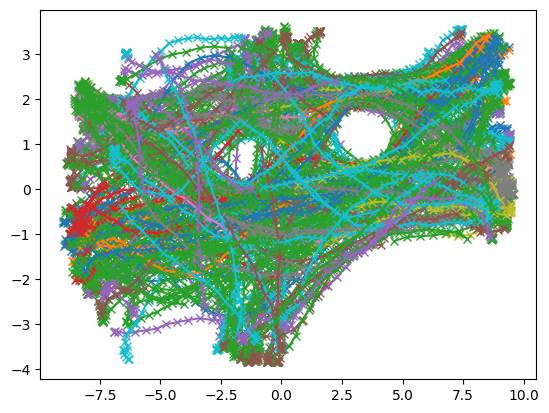

In [7]:
all_actions = list(df["action"].unique())
actions_colors = plt.cm.get_cmap("tab10", len(all_actions))

for gn, participant_tracklet in all_tracklets_participants:
    if gn[1] == "Helmet_10":
        continue
    tracklets_ids = participant_tracklet["tracklet_id"].unique()
    for tracklet_id in tracklets_ids:
        tracklet_info = participant_tracklet[
            participant_tracklet["tracklet_id"] == tracklet_id
        ]
        tracklet = tracklet_info[["x", "y"]].values
        action = tracklet_info["action"].iloc[0]
        plt.plot(
            tracklet[:, 0],
            tracklet[:, 1],
            marker="x",
            color=actions_colors(all_actions.index(action)),
        )

In [ ]:
all_actions

['WalkBox',
 'DeliverBox',
 'Walk',
 'PickBox',
 'ObserveCardDraw',
 'DrawCard',
 'PickBucket',
 'WalkBucket',
 'DeliverBucket',
 'WalkLO']